In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import utilities as utl
import msmio as mio
import os
import subprocess as sbp

In [2]:
sns.set()
sns.set(
    context     = 'talk', 
    style       = 'white', 
    font        = 'serif', 
    palette     = 'muted', 
    color_codes = True
)
sns.set_palette('Set2')
cmt = plt.cm.Set2(np.linspace(0, 1, 8))

In [3]:
gebt_name_out = [
    'x1', 'x2', 'x3', 
    'u1', 'u2', 'u3', 'r1', 'r2', 'r3', 
    'f1', 'f2', 'f3', 'm1', 'm2', 'm3',
    'p1', 'p2', 'p3', 'h1', 'h2', 'h3'
]

## Static

In [4]:
st_out = mio.readGEBTOut('rotatingbeam_static.dat')
[st_out_ps, st_out_ms] = st_out[0]
df_st_out_ns = pd.DataFrame([st_out_ps[0],], columns=gebt_name_out[:15])
for i in range(len(st_out_ms)):
    df_temp = pd.DataFrame(st_out_ms[i], columns=gebt_name_out[:15])
    df_st_out_ns = pd.concat([df_st_out_ns, df_temp], ignore_index=True)
    df_temp = pd.DataFrame([st_out_ps[i+1],], columns=gebt_name_out[:15])
    df_st_out_ns = pd.concat([df_st_out_ns, df_temp], ignore_index=True)

df_st_out_ns['x1p'] = df_st_out_ns['x1'] + df_st_out_ns['u1']
df_st_out_ns['x2p'] = df_st_out_ns['x2'] + df_st_out_ns['u2']
df_st_out_ns['x3p'] = df_st_out_ns['x3'] + df_st_out_ns['u3']
display(df_st_out_ns[:10])

,x1,x2,x3,u1,u2,u3,r1,r2,r3,f1,f2,f3,m1,m2,m3,x1p,x2p,x3p
0,0.0000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,-1.243927e-21,100.000000,0.0,0.0,0.0,2700.9718,0.000000,0.000000,0.0
1,0.7875,0.0,0.0,-0.000552,0.029599,0.0,0.0,0.0,0.037120,3.711089e+00,99.931115,0.0,0.0,0.0,2622.2770,0.786948,0.029599,0.0
2,2.3625,0.0,0.0,-0.005823,0.145398,0.0,0.0,0.0,0.109231,1.089873e+01,99.404314,0.0,0.0,0.0,2465.3041,2.356677,0.145398,0.0
3,3.9375,0.0,0.0,-0.022896,0.370660,0.0,0.0,0.0,0.177160,1.761209e+01,98.436855,0.0,0.0,0.0,2309.5114,3.914604,0.370660,0.0
4,5.5125,0.0,0.0,-0.058022,0.697849,0.0,0.0,0.0,0.241044,2.384338e+01,97.115874,0.0,0.0,0.0,2155.5240,5.454478,0.697849,0.0
5,7.0875,0.0,0.0,-0.116138,1.119368,0.0,0.0,0.0,0.300988,2.959233e+01,95.521170,0.0,0.0,0.0,2003.8356,6.971362,1.119368,0.0
6,8.6625,0.0,0.0,-0.200978,1.627663,0.0,0.0,0.0,0.357071,3.486466e+01,93.725428,0.0,0.0,0.0,1854.8195,8.461522,1.627663,0.0
7,10.2375,0.0,0.0,-0.315186,2.215308,0.0,0.0,0.0,0.409348,3.967080e+01,91.794484,0.0,0.0,0.0,1708.7404,9.922314,2.215308,0.0
8,11.8125,0.0,0.0,-0.460422,2.875071,0.0,0.0,0.0,0.457859,4.402484e+01,89.787600,0.0,0.0,0.0,1565.7640,11.352078,2.875071,0.0
9,13.3875,0.0,0.0,-0.637462,3.599963,0.0,0.0,0.0,0.502631,4.794345e+01,87.757764,0.0,0.0,0.0,1425.9680,12.750038,3.599963,0.0


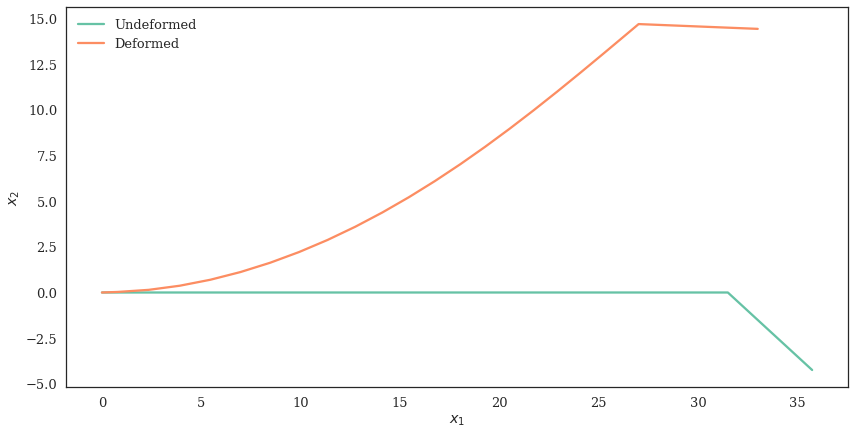

In [5]:
fig, ax = plt.subplots(figsize=(14, 7))
ax.plot('x1', 'x2', data=df_st_out_ns, label='Undeformed')
ax.plot('x1p', 'x2p', data=df_st_out_ns, label='Deformed')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.legend()
plt.show()

## Steady State

In [6]:
ss_out = mio.readGEBTOut('rotatingbeam_rpm750_steadystate.dat')
[ss_out_ps, ss_out_ms] = ss_out[0]
df_ss_out_ns = pd.DataFrame([ss_out_ps[0],], columns=gebt_name_out[:15])
for i in range(len(ss_out_ms)):
    df_temp = pd.DataFrame(ss_out_ms[i], columns=gebt_name_out)
    df_ss_out_ns = pd.concat([df_ss_out_ns, df_temp.loc[:, gebt_name_out[:15]]], ignore_index=True)
    df_temp = pd.DataFrame([ss_out_ps[i+1],], columns=gebt_name_out[:15])
    df_ss_out_ns = pd.concat([df_ss_out_ns, df_temp], ignore_index=True)

df_ss_out_ns['x1p'] = df_ss_out_ns['x1'] + df_ss_out_ns['u1']
df_ss_out_ns['x2p'] = df_ss_out_ns['x2'] + df_ss_out_ns['u2']
df_ss_out_ns['x3p'] = df_ss_out_ns['x3'] + df_ss_out_ns['u3']
display(df_ss_out_ns[:10])

,x1,x2,x3,u1,u2,u3,r1,r2,r3,f1,f2,f3,m1,m2,m3,x1p,x2p,x3p
0,0.0000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,71.395125,124.684260,0.0,0.0,0.0,2683.2849,0.000000,0.000000,0.0
1,0.7875,0.0,0.0,-0.000456,0.029295,0.0,0.0,0.0,0.036624,75.660151,121.993530,0.0,0.0,0.0,2587.2387,0.787044,0.029295,0.0
2,2.3625,0.0,0.0,-0.005387,0.143352,0.0,0.0,0.0,0.107302,83.460023,116.401780,0.0,0.0,0.0,2399.5511,2.357113,0.143352,0.0
3,3.9375,0.0,0.0,-0.021573,0.364030,0.0,0.0,0.0,0.173016,90.054761,110.788080,0.0,0.0,0.0,2220.6897,3.915927,0.364030,0.0
4,5.5125,0.0,0.0,-0.054694,0.682818,0.0,0.0,0.0,0.234091,95.539663,105.277760,0.0,0.0,0.0,2050.5894,5.457806,0.682818,0.0
5,7.0875,0.0,0.0,-0.109049,1.091492,0.0,0.0,0.0,0.290803,100.006680,99.970703,0.0,0.0,0.0,1889.0078,6.978451,1.091492,0.0
6,8.6625,0.0,0.0,-0.187747,1.582177,0.0,0.0,0.0,0.343383,103.542580,94.945446,0.0,0.0,0.0,1735.5623,8.474753,1.582177,0.0
7,10.2375,0.0,0.0,-0.292884,2.147389,0.0,0.0,0.0,0.392028,106.227760,90.262755,0.0,0.0,0.0,1589.7608,9.944616,2.147389,0.0
8,11.8125,0.0,0.0,-0.425683,2.780048,0.0,0.0,0.0,0.436902,108.135480,85.968617,0.0,0.0,0.0,1451.0271,11.386817,2.780048,0.0
9,13.3875,0.0,0.0,-0.586630,3.473488,0.0,0.0,0.0,0.478143,109.331560,82.096769,0.0,0.0,0.0,1318.7226,12.800870,3.473488,0.0


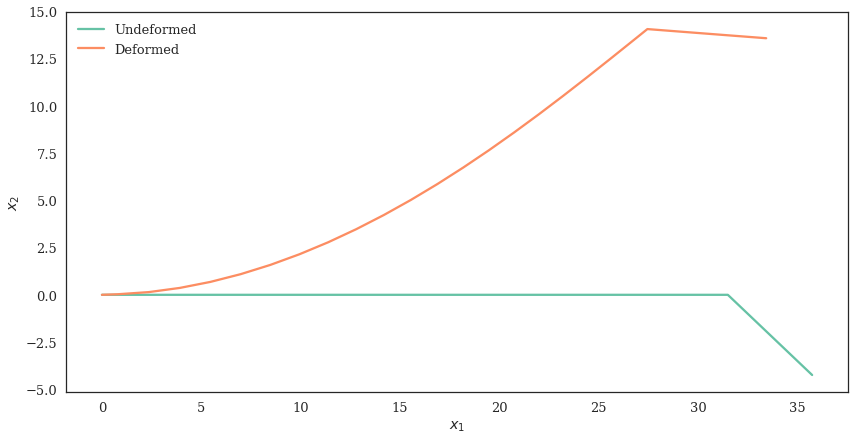

In [7]:
fig, ax = plt.subplots(figsize=(14, 7))
ax.plot('x1', 'x2', data=df_ss_out_ns, label='Undeformed')
ax.plot('x1p', 'x2p', data=df_ss_out_ns, label='Deformed')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.legend()
plt.show()

## Transient

In [12]:
tr_out = mio.readGEBTOut('rotatingbeam_rpm750_transient.dat')
nstep = len(tr_out)
point = 2
member = 1
element = 1
df_tr_out_steps = []
for s in range(nstep):
    [tr_out_ps, tr_out_ms] = tr_out[s]
    df_tr_out_ns = pd.DataFrame([tr_out_ps[point-1],], columns=gebt_name_out[:15])
    df_tr_out_ns['x1p'] = df_tr_out_ns['x1'] + df_tr_out_ns['u1']
    df_tr_out_ns['x2p'] = df_tr_out_ns['x2'] + df_tr_out_ns['u2']
    df_tr_out_ns['x3p'] = df_tr_out_ns['x3'] + df_tr_out_ns['u3']
    df_tr_out_steps.append(df_tr_out_ns)
df_tr_out_steps = pd.concat(df_tr_out_steps, ignore_index=True)
display(df_tr_out_steps[:10])

,x1,x2,x3,u1,u2,u3,r1,r2,r3,f1,f2,f3,m1,m2,m3,x1p,x2p,x3p
0,31.5,0.0,0.0,0.000242,-0.000017,0.0,0.0,0.0,0.000003,0.0,0.0,0.0,0.0,0.0,0.0,31.500242,-0.000017,0.0
1,31.5,0.0,0.0,0.000903,-0.000087,0.0,0.0,0.0,0.000018,0.0,0.0,0.0,0.0,0.0,0.0,31.500903,-0.000087,0.0
2,31.5,0.0,0.0,0.001833,-0.000229,0.0,0.0,0.0,0.000061,0.0,0.0,0.0,0.0,0.0,0.0,31.501833,-0.000229,0.0
3,31.5,0.0,0.0,0.002858,-0.000447,0.0,0.0,0.0,0.000139,0.0,0.0,0.0,0.0,0.0,0.0,31.502858,-0.000447,0.0
4,31.5,0.0,0.0,0.003798,-0.000752,0.0,0.0,0.0,0.000268,0.0,0.0,0.0,0.0,0.0,0.0,31.503798,-0.000752,0.0
5,31.5,0.0,0.0,0.004480,-0.001129,0.0,0.0,0.0,0.000471,0.0,0.0,0.0,0.0,0.0,0.0,31.504480,-0.001129,0.0
6,31.5,0.0,0.0,0.004785,-0.001530,0.0,0.0,0.0,0.000757,0.0,0.0,0.0,0.0,0.0,0.0,31.504785,-0.001530,0.0
7,31.5,0.0,0.0,0.004663,-0.001888,0.0,0.0,0.0,0.001122,0.0,0.0,0.0,0.0,0.0,0.0,31.504663,-0.001888,0.0
8,31.5,0.0,0.0,0.004141,-0.002121,0.0,0.0,0.0,0.001559,0.0,0.0,0.0,0.0,0.0,0.0,31.504141,-0.002121,0.0
9,31.5,0.0,0.0,0.003351,-0.002138,0.0,0.0,0.0,0.002048,0.0,0.0,0.0,0.0,0.0,0.0,31.503351,-0.002138,0.0


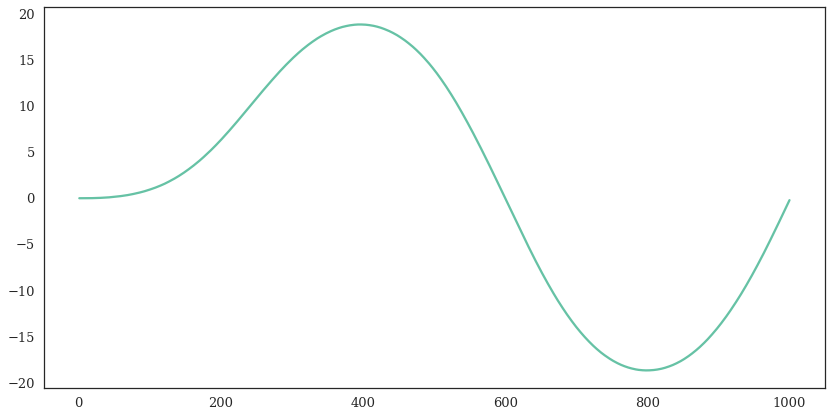

In [16]:
fig, ax = plt.subplots(figsize=(14, 7))
xs = np.arange(1, nstep+1)
ax.plot(xs, df_tr_out_steps['x2p'])
plt.show()